#Neural Network Terminologies

**Neuron**:
A neuron in a neural network typically performs two main tasks. First, it calculates the weighted sum of its inputs (which are the outputs of other neurons or features) along with a bias term. Then, it applies an activation function to this sum to determine the neuron’s output. The activation function introduces non-linearity, which helps the network learn complex patterns.

**Activation functions**

* The Threshold Function is historically used in early models like perceptrons, which are binary classification models. However, it is rarely used in modern neural networks because it lacks smooth gradients, making it unsuitable for backpropagation.

* The Sigmoid Function is primarily used in binary classification tasks, especially at the output layer of networks, to produce probabilities. It’s also used in some layers of older neural networks and certain types of models like logistic regression.

* The Rectifier (ReLU) is most commonly found in the hidden layers of deep learning models, particularly in convolutional neural networks (CNNs) and fully connected networks. Its efficiency and ability to mitigate vanishing gradient issues make it a go-to activation function in most deep learning applications.

* The Hyperbolic Tangent Function (tanh) is frequently used in the hidden layers of recurrent neural networks (RNNs) and other models where it’s beneficial for the outputs to be centered around zero. Its centered output helps improve the convergence of certain types of models.

**Neurons learn to focus on specific inputs by adjusting their weights through training, emphasizing relevant inputs and downplaying irrelevant ones.**

#How do artificial neural networks work?

* Input Layer: The network starts with an input layer where each neuron represents a feature from the dataset (e.g., in image classification, each pixel would be an input neuron). The input data is fed into the network.

* Weighted Sum: Each neuron in the next layer receives inputs from neurons in the previous layer. These inputs are multiplied by weights (which represent the importance of the connection) and then summed up. Additionally, a bias term is added to shift the result.

* Activation Function: After calculating the weighted sum, the neuron applies an activation function (like ReLU, sigmoid, or tanh). This function determines whether the neuron should be "activated" (i.e., pass a signal forward). It introduces non-linearity, allowing the network to learn more complex patterns.

* Hidden Layers: The output from the activation function of one layer becomes the input for the next layer. There can be multiple hidden layers in a neural network, where each layer processes the data further, identifying more abstract patterns as the information flows through the network.

* Output Layer: The final layer, called the output layer, produces the final predictions or classifications. For example, in a binary classification task, the output could be a probability score between 0 and 1.

* Loss Function: After the network produces an output, it compares this output to the true target value using a **loss function**. The loss function measures how far off the network's predictions are from the correct answers.

* Backpropagation: To improve accuracy, the network adjusts its internal weights. This is done through a process called backpropagation, where the error from the output is propagated back through the network. The weights are updated using gradient descent (an optimization algorithm), where small adjustments are made to reduce the error.

* Training: The neural network is trained over many epochs (iterations) where it sees the training data repeatedly. Over time, the network learns to adjust its weights to **minimize the loss function** and improve prediction accuracy.

* Prediction: After training, the network can take in new, unseen data, pass it through the layers, and make predictions based on what it has learned.

# ANN Optimization Flows

**Note**

Before training, weights are randomly assigned and uniformly affect all inputs.
After training, weights are adjusted to reflect the significance of specific inputs for each neuron, leading to a more effective and specialized neural network.

* **Gradient Descent**:
Gradient descent is an optimization algorithm used to minimize the error or loss of a model. It works by adjusting the model’s parameters (like weights in a neural network) step by step to reduce the difference between the model’s predictions and the actual targets.

*  **Stochastic Gradient Descent** (SGD):
Stochastic Gradient Descent is a variation of gradient descent. Instead of using the entire dataset to compute the gradient and update the weights, it uses only one data point (or a small batch of data) at each step. Think of it like walking down the hill, but instead of carefully calculating the steepest direction based on all the terrain, you make a guess based on just a small part of it.
This method is much faster for large datasets because it updates the model more frequently, but it introduces some noise in the updates, so it might bounce around a bit more before reaching the bottom.

Gradient can be deterministic while stchastic is considered random

* **Mini-Batch Gradient Descent** algorithm is a compromise between Batch Gradient Descent and Stochastic Gradient Descent (SGD). It processes a small, random subset of the training data (called a mini-batch) to update the model's weights in each iteration.

* **Backpropagation**:
Backpropagation is the technique used to calculate the gradients of the error with respect to each weight in the network, so they can be updated during gradient descent. In a neural network, the input is passed through the layers to produce an output (this is called forward propagation). The output is compared to the target, and the error is calculated using a loss function.
Backpropagation works by sending the error backwards through the network, layer by layer, to determine how much each weight contributed to the error.
Once the contribution of each weight to the error is known, gradient descent (or stochastic gradient descent) can be used to update the weights and reduce the error.

##Artificial neural network

Number of neurons are determined by input features

In [ ]:
# Step 1: Import TensorFlow and Keras libraries
# TensorFlow is the backend framework, and Keras provides the API for building neural networks.
from tensorflow import tf
import keras
from keras.models import Sequential
from keras.layers import Dense
tf.__version__  # Check TensorFlow version

# Step 2: Initialize an Artificial Neural Network (ANN)
# This creates a sequential model where layers are added one after another.
ann = tf.keras.Sequential()

# Step 3: Adding the first hidden layer with 6 neurons and ReLU activation
# This layer will process input features and apply the ReLU activation function.
ann.add(tf.keras.layers.Dense(units = 6, activation = "relu"))

# Step 4: Adding the second hidden layer with 6 neurons and ReLU activation
# Another hidden layer is added to increase the network's capacity to learn.
ann.add(tf.keras.layers.Dense(units = 6, activation = "relu"))

# Step 5: Adding the output layer with 1 neuron and Sigmoid activation
# The output layer uses the Sigmoid activation for binary classification.
ann.add(tf.keras.layers.Dense(units = 1, activation = "sigmoid"))

# Step 6: Compiling the ANN with Adam optimizer and binary crossentropy loss
# The Adam optimizer is used for efficient optimization, and binary crossentropy is used for classification.
ann.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

# Step 7: Training the ANN on the training set
# The network is trained with a batch size of 32 over 100 epochs.
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

# Step 8: Predicting the test set results
# This generates predictions for the test set, and values above 0.5 are classified as 1 (True).
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)

# Step 9: Making a new prediction for a specific input
# The input values are transformed before prediction, and the result is compared to 0.5 for classification.
new_prediction = ann.predict(sc.transform(np.array([[0.0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])))
new_prediction = (new_prediction > 0.5)

## Evaluating ANN

In [ ]:
# Step 1: Import necessary libraries for evaluating the ANN
# KerasClassifier wraps the Keras model for compatibility with scikit-learn.
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense

# Step 2: Define a function to build the ANN classifier
# This function initializes the ANN architecture and compiles it for training.
def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

# Step 3: Create a KerasClassifier instance for cross-validation
# This wraps the ANN model, allowing it to be used with scikit-learn's cross-validation tools.
classifier = KerasClassifier(build_fn = build_classifier, batch_size = 10, epochs = 100)

# Step 4: Perform cross-validation to evaluate the ANN
# This calculates the accuracy of the model using 10-fold cross-validation.
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10, n_jobs = -1)

# Step 5: Calculate mean and variance of accuracies
# The mean gives the average accuracy, and variance indicates the model's stability.
mean = accuracies.mean()
variance = accuracies.std()

# Step 6: Comment on potential improvement using dropout regularization
# Dropout can help reduce overfitting by randomly setting a fraction of input units to 0 during training.

## Fine Tuning ANN

In [ ]:
# Step 1: Import libraries for hyperparameter tuning
# GridSearchCV is used to find the best hyperparameters by testing all combinations.
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense

# Step 2: Define a function to build the ANN classifier with an optimizer parameter
# This allows the optimizer to be varied during the grid search.
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

# Step 3: Create a KerasClassifier instance for grid search
# This prepares the model for hyperparameter tuning using GridSearchCV.
classifier = KerasClassifier(build_fn = build_classifier)

# Step 4: Define a parameter grid for tuning the model
# This specifies which hyperparameters and values to explore during tuning.
parameters = {'batch_size': [25, 32],
              'epochs': [100, 500],
              'optimizer': ['adam', 'rmsprop']}

# Step 11: Set up GridSearchCV to find the best parameters
# This runs the grid search across the specified hyperparameter combinations.
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10)

# Step 5: Fit the grid search on the training data
# This trains the model for each combination of parameters specified in the grid.
grid_search = grid_search.fit(X_train, y_train)

# Step 6: Retrieve the best parameters and best accuracy from grid search
# This allows you to see the most effective hyperparameters found during the tuning process.
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

# Convolutional neural network

A Convolutional Neural Network (CNN) is a type of deep learning model primarily used for processing structured grid data, such as images. CNNs are designed to automatically and adaptively learn spatial hierarchies of features through backpropagation, making them highly effective for image recognition, object detection, and similar tasks. They utilize convolutional layers to scan input images with filters (kernels) to capture patterns and features at various spatial resolutions.

* The **convolution operation** involves sliding a filter (or kernel) over the input image to create a feature map, allowing the model to detect patterns such as edges and textures by calculating the dot product between the filter and local regions of the input.

* After the convolution, the **ReLU** (Rectified Linear Unit) step comes in. ReLU is a function that makes all negative values in the feature map zero, while keeping the positive values unchanged. This introduces non-linearity, meaning the network can now learn more complex patterns beyond just simple linear patterns.

**Why introduce non-linearity?** In a **linear situation**, it's like the model can only capture the basic shadows or outlines of things. So, if you have a black-and-white photo, a linear model might detect where the dark and light areas are (the shadows and highlights), but it won't understand more complex details like shapes or textures.

* **Pooling layers** then reduce the size of the feature maps by downsampling, helping to preserve important features while making the model more efficient. Max pooling, for instance, keeps only the maximum value in each patch, while average pooling computes the average value.

* The **flattening** step converts these pooled maps into a one-dimensional vector, preparing the data for the fully connected layers.

* **Fully connected layers** connect each neuron to every neuron in the previous layer, allowing the model to learn more global patterns based on the extracted features.

* The **softmax function** is applied in the final output layer for multi-class classification, converting raw output scores into probabilities that sum to one. This enables the model to predict which class has the highest probability.

* Finally, **cross-entropy loss** is used to measure the difference between the predicted probabilities and the actual labels, guiding the model's optimization process during training. It helps adjust the weights to minimize errors and improve accuracy.

**Additional notes**
* A black and white image is represented by a 2D array, where each pixel has a single intensity value (e.g., grayscale), while a color image is a 3D array, where each pixel has three intensity values (e.g., Red, Green, and Blue channels).

* Stride refers to how much the filter moves or shifts across the input image during the convolution operation. A stride of 1 means the filter moves one pixel at a time, while a higher stride skips more pixels, reducing the size of the output feature map.

* A filter (kernel) is a small matrix (like 3x3) used to scan across the image, performing element-wise multiplication to detect specific patterns such as edges, textures, or colors.

* A feature map is the output generated after applying the filter to an image. It highlights specific patterns or features like edges in different parts of the image.

* Applying filters during convolution reduces the dimensionality of the image, making processing more efficient by extracting the most important features while discarding unnecessary information.

* Feature maps are the outputs of filters applied to an image, and each filter is designed to capture a unique pattern (like detecting edges, corners, or textures). For example, one filter may detect horizontal edges, while another might detect vertical edges.
* Filters are also adjusted during back propagation

* Neurons in the final layer do the voting

* Flattening: The flattening process takes all these pooled feature maps and combines them into a single long vector. For example, if you have three pooled feature maps of size 5x5, the flattening step will convert them into a vector of size 75 (3 * 5 * 5).

### CNN Data preprocessing

In [ ]:
# Importing the necessary library for image data augmentation
# This library allows us to preprocess and augment image data to improve model generalization.
from keras.preprocessing.image import ImageDataGenerator

# Creating an instance of ImageDataGenerator for the training set
# This object rescales pixel values and applies various augmentations to increase dataset diversity.
train_datagen = ImageDataGenerator(
    rescale=1./255,         # Normalizes pixel values to the range [0, 1]
    shear_range=0.2,       # Applies shear transformations to the images
    zoom_range=0.2,        # Applies random zoom transformations to the images
    horizontal_flip=True    # Randomly flips images horizontally
)

# Generating the training set from the directory
# This loads images from the specified directory, resizes them, and applies the augmentations.
training_set = train_datagen.flow_from_directory(
    'dataset/training_set',  # Directory containing training images
    target_size=(64, 64),    # Resizes images to 64x64 pixels
    batch_size=32,           # Number of images to be yielded from the generator per batch
    class_mode='binary'      # Specifies that this is a binary classification problem
)

# Creating an instance of ImageDataGenerator for the test set
# This object rescales pixel values only (no augmentation).
test_datagen = ImageDataGenerator(rescale=1./255)

# Generating the test set from the directory
# This loads images from the specified directory and resizes them without augmentation.
test_set = test_datagen.flow_from_directory(
    'dataset/test_set',      # Directory containing test images
    target_size=(64, 64),    # Resizes images to 64x64 pixels
    batch_size=32,           # Number of images to be yielded from the generator per batch
    class_mode='binary'      # Specifies that this is a binary classification problem
)

# Fitting the CNN model to the training set
# This trains the model using the training data and validates it with the test set.
cnn.fit(
    training_set,           # Training data generator
    steps_per_epoch=8000,  # Number of batches to run for each epoch (depends on your data size)
    epochs=25,              # Total number of epochs to train the model
    validation_data=test_set,  # Validation data generator
    validation_steps=2000   # Number of validation batches to run
)

In [ ]:
# Importing necessary libraries for building a CNN
from keras.models import Sequential  # To create a sequential model
from keras.layers import Conv2D  # For convolutional layers to extract features
from keras.layers import MaxPooling2D  # For pooling layers to reduce dimensions
from keras.layers import Flatten  # To convert 2D data to 1D
from keras.layers import Dense  # For fully connected layers to make predictions

# Initializing the CNN model
cnn = Sequential()  # A sequential model to stack layers linearly.

# Step 1 - Adding the first convolutional layer
cnn.add(Conv2D(32, (3, 3),  # Applies 32 filters (or kernels) of size 3x3 to the input image.
               input_shape=(64, 64, 3),  # The input shape is set to (64, 64, 3), meaning the images are 64x64 pixels with 3 color channels (RGB).
               activation='relu'))  # The ReLU activation function introduces non-linearity, allowing the model to learn complex patterns.

# Step 2 - Adding the first pooling layer
cnn.add(MaxPooling2D(pool_size=(2, 2)))  # Max pooling with a 2x2 pool size reduces the spatial dimensions of the feature maps.

# Step 3 - Adding the second convolutional layer
cnn.add(Conv2D(32, (3, 3),  # Applies another 32 filters of size 3x3 for additional feature extraction.
               activation='relu'))  # ReLU activation function to maintain non-linearity in the model.

# Step 4 - Adding a second pooling layer
cnn.add(MaxPooling2D(pool_size=(2, 2)))  # Another max pooling layer to downsample the feature maps further.

# Step 5 - Flattening the pooled feature maps
cnn.add(Flatten())  # Converts the pooled 2D feature maps into a 1D vector to prepare for fully connected layers.

# Step 6 - Adding fully connected layers
cnn.add(Dense(units=128,  # A dense layer with 128 neurons to learn complex patterns from the features.
              activation='relu'))  # ReLU activation for non-linearity.

# Step 7 - Adding the output layer
cnn.add(Dense(units=1,  # Output layer with 1 neuron for binary classification (cat or dog).
              activation='sigmoid'))  # Sigmoid activation to output a probability between 0 and 1.

# Step 8 - Compiling the CNN
cnn.compile(optimizer='adam',  # Adam optimizer is used for efficient gradient descent.
            loss='binary_crossentropy',  # Binary cross-entropy loss function for binary classification tasks.
            metrics=['accuracy'])  # Accuracy metric to evaluate the model's performance during training.

In [ ]:
# Step 1: Importing necessary libraries for building a CNN
# This library provides functionalities to create and manage deep learning models.
import numpy as np  # For numerical operations
from keras.preprocessing import image  # For image loading and preprocessing

# Step 2: Loading and preprocessing the test image
# This step loads the image from the specified path and resizes it to match the model's input shape.
test_image = image.load_img('dataset/single_prediction/cat_or_dog_1.jpg',
                            target_size=(64, 64))  # Resize to 64x64 pixels.

# Step 3: Converting the image to a numpy array
# This converts the loaded image into a numpy array format for processing.
test_image = image.img_to_array(test_image)  # Converts the image to a numpy array.

# Step 4: Expanding dimensions to match the model's input shape
# This expands the dimensions of the numpy array to create a batch of size 1, required for prediction.
test_image = np.expand_dims(test_image,
                            axis=0)  # Adds an additional dimension for batch size.

# Step 5: Making a prediction on the processed test image
# This uses the CNN model to predict the class of the preprocessed image, outputting a probability score.
result = cnn.predict(test_image)  # Predicts the class for the test image.

# Step 6: Getting the class indices for prediction mapping
# This retrieves the mapping of class labels (like 'cat' and 'dog') to their corresponding indices used during training.
class_indices = training_set.class_indices  # Get class indices for mapping.

# Step 7: Interpreting the prediction
# This checks the predicted probability; if greater than 0.5, classify as 'dog', otherwise classify as 'cat'.
if result[0][0] > 0.5:  # Checks the predicted probability score.
    prediction = 'dog'  # Classifies as 'dog' if probability > 0.5.
else:
    prediction = 'cat'  # Otherwise, classifies as 'cat'.

**Notes**

* Single Image Needs a Batch Dimension: When you're predicting with just one image, you still need to tell the model that this is a "batch" of size 1. Without this batch dimension, the model wouldn't know how to interpret the input.

* If we have 8000 images and the batch is 32, with 25 epochs

# Recurrent neural network

**What is a Recurrent Neural Network**

A Recurrent Neural Network (RNN) is a type of neural network specifically designed to process sequential data like language, speech, or time-series data, where the order of inputs matters. Unlike traditional neural networks that process inputs independently, RNNs have a mechanism to retain information from previous inputs, giving them a form of short-term memory.

**Key Components of an RNN**

**Input Sequence:**

* RNNs are designed to handle data that arrives in sequences, such as sentences or time-based signals (e.g., audio). Each element of the sequence (such as each word in a sentence) is processed one at a time, allowing the network to analyze the order of inputs.
Hidden State (Memory):

* The hidden state in an RNN functions as a memory. As each new input is received, the RNN updates this hidden state. This means that while processing a sentence, for instance, the RNN remembers the previous words by updating its hidden state with each new word.
Loops in Architecture:

* RNNs have loops in their structure that allow the hidden state to be passed from one time step to the next. This allows the network to carry information forward in time, making it possible for the RNN to generate output based on both the current input and everything it has seen so far.

**How RNNs Work (Using a Language Example)**

Let's say an RNN is processing the sentence "The cat sat on the mat":

* Step 1: The first word, "The," is input into the network. The RNN processes this word and updates its hidden state to remember "The."

* Step 2: The next word, "cat," is input. The RNN uses its hidden state from the previous step (which contains information about "The") and combines it with the new input ("cat"). Now, the hidden state holds information about both "The" and "cat."

* Step 3: As the RNN continues through the sentence with each subsequent word ("sat," "on," etc.), it updates the hidden state, building context for the entire sentence. By the end, the RNN has a memory of the sentence and can make predictions, generate responses, or perform tasks based on this context.

RNNs work in real time, constantly updating their understanding of the sequence as new inputs arrive. The hidden state at each time step is like a memory that adapts as the network processes more data.

**Problems with RNNs**

* Vanishing Gradient Problem:
When RNNs are trained on long sequences, they struggle to learn long-term dependencies. This happens because, during the training process, the gradients (which are used to update the network’s parameters) can become extremely small as they are passed back through many layers or time steps. This makes it difficult for the network to remember earlier information, resulting in the vanishing gradient problem.
* Short-Term Memory:
Because of this problem, RNNs often only remember recent inputs well and struggle to capture long-term dependencies, limiting their effectiveness in tasks that require memory of distant information (like understanding long sentences or tracking long-term trends in time-series data).

**LSTMs: A Solution to RNN Problems**
To solve the limitations of RNNs, a variation called Long Short-Term Memory (LSTM) networks was developed. LSTMs introduce specialized components called memory cells and gates that help the network decide what to remember, what to update, and what to forget. These components allow LSTMs to capture long-term dependencies and solve the vanishing gradient problem.

**How LSTMs Work (Simple Example):**
In the sentence "I went to the store, and then I bought...," an RNN might forget the context of "store" by the time it processes "bought."
In contrast, an LSTM can selectively remember important information like "store" and carry that memory forward through the sentence to make a more meaningful prediction like "groceries" after "bought."
The memory cell in an LSTM acts like a long-term memory that can hold onto important details over extended sequences, while gates control when to let new information in, when to forget, and when to pass information forward.

**In Summary:**
* RNNs are ideal for handling sequential data where the order of inputs matters, making them useful for tasks like language modeling, speech recognition, and time-series analysis.
* RNNs process inputs in real time, constantly updating their hidden state as they receive new inputs.
However, they suffer from memory limitations due to the vanishing gradient problem, which makes it difficult for them to retain information over long sequences.
* LSTMs improve upon RNNs by using memory cells and gates to handle long-term dependencies, making them more effective at tasks requiring long-term memory.

# Vanishing Gradient Problem

**What is the Vanishing Gradient Problem?**

* The vanishing gradient problem happens when a neural network can't learn well because the updates or gradients become too small. This is common in deep networks like RNNs, where information passes through many layers or time steps. When gradients vanish, learning slows down or stops because the early layers don't get enough information to improve.

**Why Does the Gradient Weaken?**

* Multiplying Many Times: As gradients move backward through the layers, each one is multiplied by small numbers (weights and activation function derivatives). If these numbers are less than 1, the gradient becomes smaller and weaker with each step back.

* Activation Functions: Functions like sigmoid or tanh also make the gradients smaller, especially when their input is far from zero, which further weakens the signal.

**Why Wrec Affects This:**

* Small Wrec: If the recurrent weight is too small, the signal gets weaker with each step, causing the gradient to vanish. The network forgets past information, making it hard to learn long-term patterns.

* Big Wrec: If the recurrent weight is too large, the opposite happens. The gradients grow too fast, causing the network to take huge uncontrolled steps, making learning unstable.

**Example (Convex Shape - Hill):**

Imagine walking down a smooth hill (convex shape). The gradient tells you how big your steps should be.

* Vanishing Gradient (Small Steps): If the gradient is too small, it’s like taking tiny steps down the hill. You’re still moving in the right direction, but it will take forever to reach the bottom (the optimal point).

* Exploding Gradient (Big Steps): If the gradient is too large (big weights), it’s like taking huge leaps down the hill. You’ll move fast, but it’s easy to overshoot or fall, making it hard to control where you land. This causes learning to become chaotic.

**In Short:**

* Small weights = vanishing gradients (network can’t learn well, like taking tiny steps).

* Big weights = exploding gradients (learning becomes unstable, like taking huge uncontrolled leaps).

* The network needs balanced steps to learn effectively, avoiding both extremes.

#LSTM

**LSTMs (Long Short-Term Memory)** are a type of neural network designed to handle sequential data and solve the short-term memory problem in RNNs. They are built to remember important information over long sequences and forget irrelevant details using a system of gates: the input gate, forget gate, and output gate.

**Key Features:**
* Long-term memory: LSTMs can remember information from earlier in the sequence, making them effective for tasks that need to capture long-range dependencies.
* Gates control memory: These gates decide what to keep, what to forget, and how much of the memory should be used for making predictions.
* Solves vanishing gradient problem: LSTMs avoid the issue of vanishing gradients in RNNs, which allows them to retain and learn from information over longer time steps.

In short: LSTMs are an advanced version of RNNs that handle long sequences more effectively by controlling memory through gates, making them better at learning long-term patterns.

# Code description

This code builds a Recurrent Neural Network (RNN) with LSTM layers to predict Google stock prices. First, it loads and preprocesses the data by selecting the "Open" column from the dataset. To ensure better performance, the stock prices are scaled between 0 and 1 using MinMaxScaler, which helps the neural network handle varying ranges of data more effectively.

Sequences of 60 days of stock prices are created, where each sequence (input) will predict the stock price of the 61st day (output). This sequence-based approach allows the model to capture trends over time. The data is reshaped into a 3D format (number of samples, timesteps, 1 feature) since LSTM layers expect this structure for time-series data.

The RNN is then constructed using four LSTM layers with dropout to prevent overfitting. The return_sequences=True parameter ensures the model returns the entire sequence of outputs for all but the last LSTM layer. The model is compiled using the Adam optimizer, which adjusts learning rates dynamically for better training, and it's trained over 100 epochs with a batch size of 32 to fit the input-output pairs.

For testing, the test data (stock prices for 2017) is loaded and processed similarly. The last 60 days from the training data are combined with the test data to make predictions based on past prices. The test data is also scaled like the training data for consistency. The RNN then predicts stock prices for 2017.

Finally, the real and predicted stock prices are plotted for comparison, allowing us to visually assess how well the model performed.

## Step 1: Data Preprocessing


In [ ]:
# Step 1: Importing necessary libraries for building the RNN
# Libraries for data manipulation, visualization, and neural network creation.
import numpy as np  # For numerical computations
import matplotlib.pyplot as plt  # For plotting the results
import pandas as pd  # For data loading and manipulation
from sklearn.preprocessing import MinMaxScaler  # For scaling data to a specific range

from keras.models import Sequential  # To create a sequential neural network
from keras.layers import Dense  # For fully connected layers
from keras.layers import LSTM  # For Long Short-Term Memory layers (recurrent layers)
from keras.layers import Dropout  # To reduce overfitting by dropping neurons during training

# Step 2: Loading and preprocessing the training set
# Load the dataset for training, selecting the "Open" column of Google stock prices.
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values  # Selecting only the 'Open' column

# Step 3: Feature scaling
# Scaling the stock prices between 0 and 1 for better neural network performance.
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Step 4: Creating a data structure with 60 timesteps and 1 output
# We create sequences of 60 previous stock prices as input (X) and 1 future price as output (y).
X_train = []  # Input sequences
y_train = []  # Target prices
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60:i, 0])  # Last 60 days' stock prices
    y_train.append(training_set_scaled[i, 0])  # Stock price on the 61st day
X_train, y_train = np.array(X_train), np.array(y_train)  # Convert to NumPy arrays

# Step 5: Reshaping the data for the LSTM
# Reshape the input to 3D: (number of samples, number of timesteps, 1 feature).
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Step 2: Building the RNN


In [ ]:
# Step 6: Initializing the Recurrent Neural Network (RNN)
# Using the Sequential model to stack layers one after another.
rnn = Sequential()

# Step 7: Adding the first LSTM layer with dropout regularization
# LSTM with 50 units, returning sequences, with dropout to avoid overfitting.
rnn.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
rnn.add(Dropout(0.2))  # Drops 20% of the neurons randomly during training

# Step 8: Adding additional LSTM layers and dropout
# Add 3 more LSTM layers with 50 units each, plus dropout after each layer.
rnn.add(LSTM(units=50, return_sequences=True))
rnn.add(Dropout(0.2))

rnn.add(LSTM(units=50, return_sequences=True))
rnn.add(Dropout(0.2))

rnn.add(LSTM(units=50))
rnn.add(Dropout(0.2))

# Step 9: Adding the output layer
# A Dense layer with 1 unit to predict the next stock price.
rnn.add(Dense(units=1))

# Step 10: Compiling the RNN
# Compile the model with Adam optimizer and mean squared error (MSE) loss for regression.
rnn.compile(optimizer='adam', loss='mean_squared_error')

# Step 11: Fitting the RNN to the training set
# Train the RNN with the training data, running 100 epochs and a batch size of 32.
rnn.fit(X_train, y_train, epochs=100, batch_size=32)

##Step 3: Making the predictions and visualising the results


In [ ]:
# Step 12: Preparing the test set for prediction
# Load the test data (actual stock prices for 2017).
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values  # Selecting only the 'Open' column

# Step 13: Preparing inputs for prediction
# Combine the training and test sets, and create input sequences of 60 timesteps for prediction.
# 'dataset_train' contains the stock prices for training, and 'dataset_test' contains the stock prices for testing.
# We concatenate these two datasets along the vertical axis (axis=0) to have a continuous time series of stock prices.
# This allows us to pull the last 60 days of data from the training set to help predict the first day of the test set.
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)

# Extract the relevant inputs from the combined dataset.
# We want to take the last 60 days of data from the training set and combine them with the test set data.
# len(dataset_total) gives the total number of rows in the combined dataset, and len(dataset_test) gives the number of rows in the test set.
# We subtract 60 from the start to include the 60 timesteps before the test set period.
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values  # Last 60 + test data

# Reshape the input data into a 2D array where each row corresponds to a stock price and there is 1 column (1 feature).
# The '-1' argument tells NumPy to calculate the number of rows automatically, based on the length of 'inputs'.
# The '1' specifies that we have 1 feature (the stock price) for each timestep.
inputs = inputs.reshape(-1, 1)

# Scale the inputs using the same MinMaxScaler ('sc') used for the training data to ensure consistent scaling.
# This step is necessary because the model was trained on scaled data, so the test data must be scaled in the same way before predictions.
inputs = sc.transform(inputs)  # Scale the inputs like we did with training data


# Step 14: Creating input data for the test set
# Similar to training, create sequences of 60 previous stock prices for the test set.
# We need to create input sequences, where each sequence contains the stock prices of the previous 60 days to predict the next day.
X_test = []

# Loop through the test data to create input sequences.
# The range(60, 80) means that we're creating sequences starting from the 60th day of the combined dataset up to the 80th day.
# For each day 'i', we take the stock prices from 'i-60' to 'i' (the previous 60 days).
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])  # Create sequences for the test set

# Convert the test set input data into a NumPy array for use in the model.
X_test = np.array(X_test)

# Reshape the input data to be 3D so it can be fed into the LSTM.
# The shape is (number of samples, number of timesteps, 1 feature), where:
# X_test.shape[0] = number of samples (days),
# X_test.shape[1] = number of timesteps (60),
# and 1 feature (the stock price at each timestep).
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Step 15: Predicting the stock prices for the test set
# Use the trained model to predict future stock prices and reverse the scaling.
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Step 16: Visualizing the results
# Plot the real vs predicted stock prices to compare the RNN's performance.
plt.plot(real_stock_price, color='red', label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

**Why Use 2D Format:**
* Many machine learning libraries expect input to be in a 2D shape, even when working with a single feature.

**return_sequences=True in LSTM**
* If return_sequences=True, the LSTM returns the output for all timesteps, which is passed to the next LSTM layer.
If return_sequences=False, only the output from the last timestep is returned. In a stacked LSTM, return_sequences=True is typically used for the intermediate layers, so the following LSTM layers can get the entire sequence.

**Timesteps in Stock Prediction**
* Timesteps represent how many past data points the model looks at to make a prediction (e.g., using the stock prices from the last 60 days to predict tomorrow’s price).
More timesteps mean the model remembers longer histories, like increasing the window from 60 days to 120 days.

**Reshaping the Data for LSTM**
* Reshaping converts the input data into a 3D format: (number of samples, number of timesteps, number of features).
This is needed for LSTMs, which process data over time, like stock prices over the past 60 days.
Example: You reshape data to (X_train.shape[0], 60, 1) where 60 is the number of timesteps and 1 is the single feature (stock price).

# Improving the RNN
**Here are different ways to improve the RNN model:**

* Getting more training data: we trained our model on the past 5 years of the Google Stock Price but it would be even better to train it on the past 10 years.

* Increasing the number of timesteps: the model remembered the stock prices from the 60 previous financial days to predict the stock price of the next day. That’s because we chose a number of 60 timesteps (3 months). You could try to increase the number of timesteps, by choosing for example 120 timesteps (6 months).

* Adding some other indicators: if you have the financial instinct that the stock price of some other companies might be correlated to the one of Google, you could add this other stock price as a new indicator in the training data.

* Adding more LSTM layers: we built a RNN with four LSTM layers but you could try with even more.

* Adding more neurones in the LSTM layers: we highlighted the fact that we needed a high number of neurones in the LSTM layers to respond better to the complexity of the problem and we chose to include 50 neurones in each of our 4 LSTM layers. You could try an architecture with even more neurones in each of the 4 (or more) LSTM layers.

# LSTM Variations

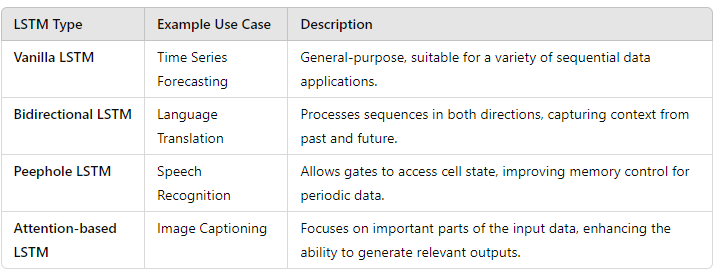